<h1> __________________Sepehr Rezaei__________________ 
<h3> ________________________rsepehr746@gmail.com________________________ 

In [1]:
import pandas as pd

<h1>load data

In [2]:
text=pd.read_csv( 'spam.csv',encoding='ISO-8859-1')
text.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
text.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)
# Verify the updated DataFrame
text.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<h4>number of ham & spam sms 

In [4]:
text['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<h3>change ham to 0 and spam to 1

In [5]:
text['v1'] = text['v1'].replace({'ham': 0, 'spam': 1})
text.head(10)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


<h2>Data Pre_Processing

<h4>make words to lowercase

In [6]:
text['v2']=text['v2'].str.lower()
text.head(10)

,v1,v2
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
5,1,freemsg hey there darling it's been 3 week's n...
6,0,even my brother is not like to speak with me. ...
7,0,as per your request 'melle melle (oru minnamin...
8,1,winner!! as a valued network customer you have...
9,1,had your mobile 11 months or more? u r entitle...


<h4>removing stop words

In [7]:
from nltk.corpus import stopwords
import nltk


In [8]:
stopword=set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stopword]
    return ' '.join(words)
# Apply the remove_stopwords function to the 'sms' column
text['v2'] = text['v2'].apply(remove_stopwords)
text.head(10)

,v1,v2
0,0,"go jurong point, crazy.. available bugis n gre..."
1,0,ok lar... joking wif u oni...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor... u c already say...
4,0,"nah think goes usf, lives around though"
5,1,freemsg hey darling 3 week's word back! i'd li...
6,0,even brother like speak me. treat like aids pa...
7,0,per request 'melle melle (oru minnaminunginte ...
8,1,winner!! valued network customer selected rece...
9,1,mobile 11 months more? u r entitled update lat...


<h4>Stemming with Porter stemmer 

In [9]:
from nltk.stem import porter
Pstemmer = porter.PorterStemmer()

In [10]:
text['v2'] = [Pstemmer.stem(word=wo) for wo in text['v2']]
text.head(10)

,v1,v2
0,0,"go jurong point, crazy.. available bugis n gre..."
1,0,ok lar... joking wif u oni...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor... u c already say...
4,0,"nah think goes usf, lives around though"
5,1,freemsg hey darling 3 week's word back! i'd li...
6,0,even brother like speak me. treat like aids pa...
7,0,per request 'melle melle (oru minnaminunginte ...
8,1,winner!! valued network customer selected rece...
9,1,mobile 11 months more? u r entitled update lat...


<h1>store preprocessed data

In [11]:
text.to_csv('ready_text.csv')

<h2>Tokenization-TF*IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
TFFi=TfidfVectorizer()
tffi_tokenized_text=TFFi.fit_transform(text['v2'])
tffi_tokenized_text


<5572x8820 sparse matrix of type '<class 'numpy.float64'>'
	with 50149 stored elements in Compressed Sparse Row format>

<h1>Bag of Word

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(text['v2'])
bow_tokenized_text=bow_model.toarray()      # returns the rows and column number of cells which have 1 as value
print(bow_tokenized_text)  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<h1>Split data to Train and test 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
tffi_x_train,tffi_x_test,tffi_y_train,tffi_y_test=train_test_split(tffi_tokenized_text,text['v1'],random_state=42,shuffle=True,test_size=0.3,stratify=text['v1'])
bow_x_train,bow_x_test,bow_y_train,bow_y_test=train_test_split(bow_tokenized_text,text['v1'],random_state=42,shuffle=True,test_size=0.3,stratify=text['v1'])

<h1>measures

In [18]:
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score

<h1>KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
tffi_knn=KNeighborsClassifier(n_neighbors=13)
tffi_knn.fit(tffi_x_train,tffi_y_train)
knn_tffi_pred=tffi_knn.predict(X=tffi_x_test)
tffi_knn.score(X=tffi_x_test,y=tffi_y_test)

0.9479665071770335

In [21]:
bow_knn=KNeighborsClassifier(n_neighbors=13)
bow_knn.fit(X=bow_x_train,y=bow_y_train)
knn_bow_pred=bow_knn.predict(X=bow_x_test)
bow_knn.score(X=bow_x_test,y=bow_y_test)

0.8773923444976076

<h2>Measurin knn algorithms


In [22]:
knn_tffi_precision = precision_score(y_true=tffi_y_test,y_pred= knn_tffi_pred)
knn_tffi_recall = recall_score(y_true=tffi_y_test, y_pred=knn_tffi_pred)
knn_tffi_f1 = f1_score(y_true=tffi_y_test, y_pred=knn_tffi_pred)
knn_tffi_accuracy = accuracy_score(y_true=tffi_y_test, y_pred=knn_tffi_pred)
print("Measuring knn wit TF*IDF :\n")
print("Accuracy:", knn_tffi_accuracy)
print("Recall:", knn_tffi_recall)
print("Precision:", knn_tffi_precision)
print("F1-score:", knn_tffi_f1)

knn_bow_precision = precision_score(y_true=bow_y_test, y_pred=knn_bow_pred)
knn_bow_recall = recall_score(y_true=bow_y_test, y_pred=knn_bow_pred)
knn_bow_f1 = f1_score(y_true=bow_y_test, y_pred=knn_bow_pred)
knn_bow_accuracy = accuracy_score(y_true=bow_y_test, y_pred=knn_bow_pred)
print("\n\nMeasuring knn wit BOW :\n")
print("Accuracy:", knn_bow_accuracy)
print("Recall:", knn_bow_recall)
print("Precision:", knn_bow_precision)
print("F1-score:", knn_bow_f1)

Measuring knn wit TF*IDF :

Accuracy: 0.9479665071770335
Recall: 0.6116071428571429
Precision: 1.0
F1-score: 0.7590027700831026


Measuring knn wit BOW :

Accuracy: 0.8773923444976076
Recall: 0.08482142857142858
Precision: 1.0
F1-score: 0.15637860082304528


<h1>Random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

<h5>Random forest with TF*IDF

In [24]:
tffi_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')
tffi_Random_F.fit(tffi_x_train,tffi_y_train)
tffi_Randmon_F_pred=tffi_Random_F.predict(X=tffi_x_test)
tffi_Random_F.score(X=tffi_x_test,y=tffi_y_test)

0.9826555023923444

<h5>Random_forest with BOW

In [25]:
bow_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')
bow_Random_F.fit(bow_x_train,bow_y_train)
bow_Randmon_F_pred=bow_Random_F.predict(X=bow_x_test)
bow_Random_F.score(X=bow_x_test,y=bow_y_test)

0.9748803827751196

<h4>Measuring both Random Forest 

In [26]:
tffi_Random_F_precision = precision_score(tffi_y_test, tffi_Randmon_F_pred)
tffi_Random_F_recall = recall_score(tffi_y_test, tffi_Randmon_F_pred)
tffi_Random_F_f1 = f1_score(tffi_y_test, tffi_Randmon_F_pred)
tffi_Random_F_accuracy = accuracy_score(tffi_y_test, tffi_Randmon_F_pred)
print("Measuring Random forest wit TF*IDF :\n")
print("Accuracy:", tffi_Random_F_accuracy)
print("Recall:", tffi_Random_F_recall)
print("Precision:", tffi_Random_F_precision)
print("F1-score:", tffi_Random_F_f1)

bow_Random_F_precision = precision_score(bow_y_test, bow_Randmon_F_pred)
bow_Random_F_recall = recall_score(bow_y_test, bow_Randmon_F_pred)
bow_Random_F_f1 = f1_score(bow_y_test, bow_Randmon_F_pred)
bow_Random_F_accuracy = accuracy_score(bow_y_test, bow_Randmon_F_pred)
print("\n\nMeasuring Random forest wit BOW :\n")
print("Accuracy:", bow_Random_F_accuracy)
print("Recall:", bow_Random_F_recall)
print("Precision:", bow_Random_F_precision)
print("F1-score:", bow_Random_F_f1)

Measuring Random forest wit TF*IDF :

Accuracy: 0.9826555023923444
Recall: 0.8705357142857143
Precision: 1.0
F1-score: 0.9307875894988067


Measuring Random forest wit BOW :

Accuracy: 0.9748803827751196
Recall: 0.8125
Precision: 1.0
F1-score: 0.896551724137931


<h1>SVM

In [27]:
from sklearn import svm

<h5>SVM with TF*IDF

In [28]:
tffi_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)
tffi_SVM.fit(tffi_x_train,tffi_y_train)
tffi_SVM_pred=tffi_SVM.predict(X=tffi_x_test)
tffi_SVM.score(X=tffi_x_test,y=tffi_y_test)

0.9838516746411483

<h5>SVM with BOW

In [29]:
bow_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)
bow_SVM.fit(bow_x_train,bow_y_train)
bow_SVM_pred=bow_SVM.predict(X=bow_x_test)
bow_SVM.score(X=bow_x_test,y=bow_y_test)

0.9784688995215312

<h3>Measuring SVM

In [30]:
tffi_SVM_precision = precision_score(tffi_y_test, tffi_SVM_pred)
tffi_SVM_recall = recall_score(tffi_y_test, tffi_SVM_pred)
tffi_SVM_f1 = f1_score(tffi_y_test, tffi_SVM_pred)
tffi_SVM_accuracy = accuracy_score(tffi_y_test, tffi_SVM_pred)
print("Measuring SVM wit TF*IDF :\n")
print("Accuracy:", tffi_SVM_accuracy)
print("Recall:", tffi_SVM_recall)
print("Precision:", tffi_SVM_precision)
print("F1-score:", tffi_SVM_f1)

bow_SVM_precision = precision_score(bow_y_test, bow_SVM_pred)
bow_SVM_recall = recall_score(bow_y_test, bow_SVM_pred)
bow_SVM_f1 = f1_score(bow_y_test, bow_SVM_pred)
bow_SVM_accuracy = accuracy_score(bow_y_test, bow_SVM_pred)
print("\n\nMeasuring SVM wit BOW :\n")
print("Accuracy:", bow_SVM_accuracy)
print("Recall:", bow_SVM_recall)
print("Precision:", bow_SVM_precision)
print("F1-score:", bow_SVM_f1)

Measuring SVM wit TF*IDF :

Accuracy: 0.9838516746411483
Recall: 0.8928571428571429
Precision: 0.9852216748768473
F1-score: 0.936768149882904


Measuring SVM wit BOW :

Accuracy: 0.9784688995215312
Recall: 0.8392857142857143
Precision: 1.0
F1-score: 0.9126213592233009


<h1>Navie Bayse


In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
gb_tf=GaussianNB()
gb_tf.fit(X=tffi_x_train.toarray(),y=tffi_y_train)
tffi_gb_pred=gb_tf.predict(X=tffi_x_test.toarray())
gb_tf.score(X=tffi_x_test.toarray(),y=tffi_y_test)

0.9084928229665071

In [33]:
gb_bow=GaussianNB()
gb_bow.fit(X=bow_x_train,y=bow_y_train)
bow_gb_pred=gb_bow.predict(X=bow_x_test)
gb_tf.score(X=bow_x_test,y=bow_y_test)

0.9102870813397129

In [34]:
tffi_gb_precision = precision_score(y_true=tffi_y_test,y_pred= tffi_gb_pred)
tffi_gb_recall = recall_score(y_true=tffi_y_test, y_pred=tffi_gb_pred)
tffi_gb_f1 = f1_score(y_true=tffi_y_test, y_pred=tffi_gb_pred)
tffi_gb_accuracy = accuracy_score(y_true=tffi_y_test, y_pred=tffi_gb_pred)
print("Measuring gb with TF*IDF :\n")
print("Accuracy:", tffi_gb_accuracy)
print("Recall:", tffi_gb_recall)
print("Precision:", tffi_gb_precision)
print("F1-score:", tffi_gb_f1)

bow_gb_precision = precision_score(y_true=bow_y_test, y_pred=bow_gb_pred)
bow_gb_recall = recall_score(y_true=bow_y_test, y_pred=bow_gb_pred)
bow_gb_f1 = f1_score(y_true=bow_y_test, y_pred=bow_gb_pred)
bow_gb_accuracy = accuracy_score(y_true=bow_y_test,y_pred= bow_gb_pred)
print("\n\nMeasuring gb with BOW :\n")
print("Accuracy:", bow_gb_accuracy)
print("Recall:", bow_gb_recall)
print("Precision:", bow_gb_precision)
print("F1-score:", bow_gb_f1)

Measuring gb with TF*IDF :

Accuracy: 0.9084928229665071
Recall: 0.8883928571428571
Precision: 0.6085626911314985
F1-score: 0.7223230490018149


Measuring gb with BOW :

Accuracy: 0.909688995215311
Recall: 0.9017857142857143
Precision: 0.6102719033232629
F1-score: 0.7279279279279279


<h1>Learning MLP

In [35]:
from tensorflow import  keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

<h5>split TF*IDF data

In [36]:
mlp_tf_x_train_full, mlp_tf_x_test, mlp_tf_y_train_full, mlp_tf_y_test = train_test_split(tffi_tokenized_text.toarray(),text['v1'],random_state=42,shuffle=True,test_size=0.1,stratify=text['v1'])
mlp_tf_x_train,mlp_tf_x_valid, mlp_tf_y_train, mlp_tf_y_valid = train_test_split(mlp_tf_x_train_full, mlp_tf_y_train_full,test_size=0.1)


<h5>split BOW data

In [37]:
mlp_bow_x_train_full, mlp_bow_x_test, mlp_bow_y_train_full, mlp_bow_y_test = train_test_split(bow_tokenized_text,text['v1'],random_state=42,shuffle=True,test_size=0.1,stratify=text['v1'])
mlp_bow_x_train,mlp_bow_x_valid, mlp_bow_y_train, mlp_bow_y_valid = train_test_split(mlp_bow_x_train_full, mlp_bow_y_train_full,test_size=0.1)


<h3>MLP with TF*IDF

In [38]:
from tensorflow import  keras
import random
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [39]:
model1 = Sequential()
model1.add(Dense(200, activation='relu', input_shape=(mlp_tf_x_train.shape[1],)))
model1.add(Dense(1, activation='sigmoid'))


compile model

In [40]:
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


Train and Evaluate

In [41]:
history1 = model1.fit(mlp_tf_x_train, mlp_tf_y_train, validation_data=(mlp_tf_x_valid, mlp_tf_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score1 = model1.evaluate(mlp_tf_x_test, mlp_tf_y_test)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Epoch 1/10
 34/141 [======>.......................] - ETA: 0s - loss: 0.5970 - accuracy: 0.8373

141/141 [==============================] - 1s 7ms/step - loss: 0.3298 - accuracy: 0.8974 - val_loss: 0.1068 - val_accuracy: 0.9761
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0579 - accuracy: 0.9869 - val_loss: 0.0616 - val_accuracy: 0.9801
Epoch 3/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0203 - accuracy: 0.9960 - val_loss: 0.0552 - val_accuracy: 0.9821
Epoch 4/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0094 - accuracy: 0.9984 - val_loss: 0.0550 - val_accuracy: 0.9821
Epoch 5/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0052 - accuracy: 0.9996 - val_loss: 0.0548 - val_accuracy: 0.9821
Epoch 6/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0031 - accuracy: 0.9998 - val_loss: 0.0556 - val_accuracy: 0.9821
Epoch 7/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9821
Epoch 8/10
141/14

<h4>evaluate model on trainig data

<h1>plot train and test acurracy plot

In [42]:
from matplotlib import pyplot

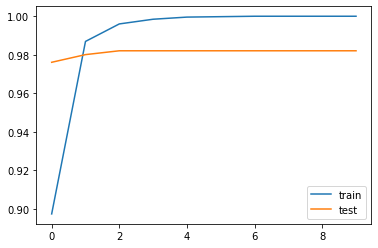

In [43]:
pyplot.plot(history1.history['accuracy'], label='train')
pyplot.plot(history1.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [44]:
# Evaluating the model on the train set
train_loss1, train_accuracy1 = model1.evaluate(mlp_tf_x_train, mlp_tf_y_train)
print("Train Loss:", train_loss1)
print("Train Accuracy:", train_accuracy1)

  1/141 [..............................] - ETA: 2s - loss: 2.0205e-04 - accuracy: 1.0000

141/141 [==============================] - 0s 2ms/step - loss: 6.5595e-04 - accuracy: 1.0000
Train Loss: 0.000655949639622122
Train Accuracy: 1.0


<h4>evaluate model on test data

In [45]:
y_pred_prob1 = model1.predict(mlp_tf_x_test)

# Converting probabilities to class labels based on a threshold 
y_pred1 = (y_pred_prob1 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision1 = precision_score(mlp_tf_y_test, y_pred1)
recall1 = recall_score(mlp_tf_y_test, y_pred1)
f11 = f1_score(mlp_tf_y_test, y_pred1)
accuracy1 = accuracy_score(mlp_tf_y_test, y_pred1)

print("Accuracy:", accuracy1)
print("Recall:", recall1)
print("Precision:", precision1)
print("F1-score:", f11)


18/18 [==============================] - 0s 2ms/step
Accuracy: 0.9802867383512545
Recall: 0.8533333333333334
Precision: 1.0
F1-score: 0.9208633093525179


<h1>MLP with BOW

Define the neural network model

In [46]:
model2 = Sequential()
model2.add(Dense(200, activation='relu', input_shape=(mlp_bow_x_train.shape[1],)))
model2.add(Dense(1, activation='sigmoid'))

Compile the model with SCA optimizer

In [47]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Train and Evaluate

In [48]:
history2 = model2.fit(mlp_bow_x_train, mlp_bow_y_train, validation_data=(mlp_bow_x_valid, mlp_bow_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score2 = model2.evaluate(mlp_bow_x_test, mlp_bow_y_test)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Epoch 1/10


141/141 [==============================] - 1s 7ms/step - loss: 0.2275 - accuracy: 0.9594 - val_loss: 0.0820 - val_accuracy: 0.9801
Epoch 2/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0296 - accuracy: 0.9938 - val_loss: 0.0701 - val_accuracy: 0.9841
Epoch 3/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0102 - accuracy: 0.9980 - val_loss: 0.0765 - val_accuracy: 0.9821
Epoch 4/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0044 - accuracy: 0.9996 - val_loss: 0.0820 - val_accuracy: 0.9821
Epoch 5/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.0900 - val_accuracy: 0.9801
Epoch 6/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0950 - val_accuracy: 0.9801
Epoch 7/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0992 - val_accuracy: 0.9801
Epoch 8/10
141/14

<h4>evaluate model on trainig data

In [49]:
# Evaluating the model on the train set
train_loss2, train_accuracy2 = model2.evaluate(mlp_bow_x_train, mlp_bow_y_train)
print("Train Loss:", train_loss2)
print("Train Accuracy:", train_accuracy2)

 25/141 [====>.........................] - ETA: 0s - loss: 4.5621e-04 - accuracy: 1.0000

141/141 [==============================] - 0s 2ms/step - loss: 5.9021e-04 - accuracy: 0.9998
Train Loss: 0.0005902071134187281
Train Accuracy: 0.9997783899307251


<h4>evaluate model on test data

In [50]:
y_pred_prob2 = model2.predict(mlp_bow_x_test)

# Converting probabilities to class labels based on a threshold 
y_pred2 = (y_pred_prob2 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision2 = precision_score(mlp_bow_y_test, y_pred2)
recall2 = recall_score(mlp_bow_y_test, y_pred2)
f12 = f1_score(mlp_bow_y_test, y_pred2)
accuracy2 = accuracy_score(mlp_bow_y_test, y_pred2)

print("Accuracy:", accuracy2)
print("Recall:", recall2)
print("Precision:", precision2)
print("F1-score:", f12)


18/18 [==============================] - 0s 2ms/step


Accuracy: 0.982078853046595
Recall: 0.8666666666666667
Precision: 1.0
F1-score: 0.9285714285714286


<h3>MLP with scaled data  TF*IDF

In [51]:
from sklearn.preprocessing import StandardScaler

scailing data

In [52]:
scaler = StandardScaler()
mlp_tf_x_train_scaled = scaler.fit_transform(mlp_tf_x_train)
mlp_tf_x_valid_scaled = scaler.transform(mlp_tf_x_valid)
mlp_tf_x_test_scaled = scaler.transform(mlp_tf_x_test)

Defining model

In [53]:
model3 = Sequential()
model3.add(Dense(200, activation='relu', input_shape=(mlp_tf_x_train_scaled.shape[1],)))
model3.add(Dense(1, activation='sigmoid'))

Compiling the model

In [54]:
model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Train and Evaluate

In [55]:
history3 = model3.fit(mlp_tf_x_train_scaled, mlp_tf_y_train, validation_data=(mlp_tf_x_valid_scaled, mlp_tf_y_valid), epochs=10, batch_size=32)
test_loss3, test_accuracy3 = model3.evaluate(mlp_tf_x_test_scaled, mlp_tf_y_test)
print("Test Loss:", test_loss3)
print("Test Accuracy:", test_accuracy3)

Epoch 1/10


141/141 [==============================] - 1s 5ms/step - loss: 2.5620 - accuracy: 0.8129 - val_loss: 0.5171 - val_accuracy: 0.9622
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0760 - accuracy: 0.9896 - val_loss: 0.2161 - val_accuracy: 0.9681
Epoch 3/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.1871 - val_accuracy: 0.9701
Epoch 4/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0032 - accuracy: 0.9998 - val_loss: 0.1652 - val_accuracy: 0.9741
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1524 - val_accuracy: 0.9741
Epoch 6/10
141/141 [==============================] - 1s 5ms/step - loss: 5.7692e-04 - accuracy: 1.0000 - val_loss: 0.1440 - val_accuracy: 0.9741
Epoch 7/10
141/141 [==============================] - 1s 5ms/step - loss: 3.3738e-04 - accuracy: 1.0000 - val_loss: 0.1390 - val_accuracy: 0.9781
Epoch 8/1

<h4>evaluate model on test data

In [56]:
y_pred_prob3 = model3.predict(mlp_tf_x_test_scaled)

# Converting probabilities to class labels based on a threshold 
y_pred3 = (y_pred_prob3 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision3 = precision_score(mlp_tf_y_test, y_pred3)
recall3 = recall_score(mlp_tf_y_test, y_pred3)
f13 = f1_score(mlp_tf_y_test, y_pred3)
accuracy3 = accuracy_score(mlp_tf_y_test, y_pred3)

print("Accuracy:", accuracy3)
print("Recall:", recall3)
print("Precision:", precision3)
print("F1-score:", f13)


18/18 [==============================] - 0s 1ms/step


Accuracy: 0.9731182795698925
Recall: 0.8133333333333334
Precision: 0.9838709677419355
F1-score: 0.8905109489051095


<h1>Voting betwen classifiers

In [57]:
from sklearn.ensemble import VotingClassifier

In [58]:
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.wrappers.scikit_learn import KerasClassifier
class MLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        self.model = Sequential()
        self.model.add(Dense(200, activation='relu', input_shape=(X.shape[1],)))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=10, batch_size=32)

    def predict(self, X):
        return np.squeeze((self.model.predict(X) > 0.5).astype(int))

In [59]:
#votting betwen SVM and Random_f and KNN in tf-idf
ensemble1 = VotingClassifier(estimators=[ ('SVM', tffi_SVM), ('RF', tffi_Random_F), ('knn', tffi_knn)], voting='hard')

In [60]:
ensemble1.fit(tffi_x_train,tffi_y_train)

VotingClassifier(estimators=[('SVM', SVC(C=10, gamma=0.1)),
                             ('RF', RandomForestClassifier(n_estimators=31)),
                             ('knn', KNeighborsClassifier(n_neighbors=13))])

In [61]:
ens_prd1=ensemble1.predict(tffi_x_test)

In [62]:
ens1_precision = precision_score(y_true=tffi_y_test, y_pred=ens_prd1)
ens1_recall = recall_score(y_true=tffi_y_test,y_pred= ens_prd1)
ens1_f1 = f1_score(y_true=tffi_y_test, y_pred=ens_prd1)
ens1_accuracy = accuracy_score(y_true=tffi_y_test, y_pred=ens_prd1)

print("Accuracy:", ens1_accuracy)
print("Recall:", ens1_recall)
print("Precision:", ens1_precision)
print("F1-score:", ens1_f1)

Accuracy: 0.9796650717703349
Recall: 0.8482142857142857
Precision: 1.0
F1-score: 0.9178743961352658


<h3>add mlp to votting

In [63]:
mlp_classifier_tf1 = MLPClassifier()
ensemble2 = VotingClassifier(estimators=[ ('mlp',mlp_classifier_tf1),('SVM', tffi_SVM), ('RF', tffi_Random_F), ('knn', tffi_knn)], voting='hard')

In [64]:
ensemble2.fit(X=tffi_x_train,y=tffi_y_train)

Epoch 1/10


122/122 [==============================] - 2s 10ms/step - loss: 0.3620 - accuracy: 0.8856
Epoch 2/10
122/122 [==============================] - 1s 12ms/step - loss: 0.0731 - accuracy: 0.9846
Epoch 3/10
122/122 [==============================] - 1s 12ms/step - loss: 0.0248 - accuracy: 0.9949
Epoch 4/10
122/122 [==============================] - 1s 11ms/step - loss: 0.0119 - accuracy: 0.9982
Epoch 5/10
122/122 [==============================] - 1s 12ms/step - loss: 0.0066 - accuracy: 0.9987
Epoch 6/10
122/122 [==============================] - 2s 13ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 7/10
122/122 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 8/10
122/122 [==============================] - 1s 11ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 9/10
122/122 [==============================] - 1s 11ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/10
122/122 [==============================] - 1s 11ms/step - loss: 0.0011 - accuracy: 1.0000


VotingClassifier(estimators=[('mlp', MLPClassifier()),
                             ('SVM', SVC(C=10, gamma=0.1)),
                             ('RF', RandomForestClassifier(n_estimators=31)),
                             ('knn', KNeighborsClassifier(n_neighbors=13))])

In [65]:
ens_prd2=ensemble2.predict(tffi_x_test)

53/53 [==============================] - 0s 673us/step


In [66]:
ens2_precision = precision_score(y_true=tffi_y_test,y_pred=ens_prd2)
ens2_recall = recall_score(y_true=tffi_y_test, y_pred=ens_prd2)
ens2_f1 = f1_score(y_true=tffi_y_test, y_pred=ens_prd2)
ens2_accuracy = accuracy_score(y_true=tffi_y_test, y_pred=ens_prd2)

print("Accuracy:", ens2_accuracy)
print("Recall:", ens2_recall)
print("Precision:", ens2_precision)
print("F1-score:", ens2_f1)

Accuracy: 0.9772727272727273
Recall: 0.8303571428571429
Precision: 1.0
F1-score: 0.9073170731707317


<h3>votting with BOW

In [67]:
mlp_classifier_bow1 = MLPClassifier()
ensemble3 = VotingClassifier(estimators=[('mlp',mlp_classifier_bow1),('SVM', tffi_SVM), ('RF', tffi_Random_F), ('knn', tffi_knn)], voting='hard')

In [68]:
ensemble3.fit(X=bow_x_train,y=bow_y_train)
ens_prd3=ensemble3.predict(bow_x_test)


Epoch 1/10


122/122 [==============================] - 1s 5ms/step - loss: 0.2526 - accuracy: 0.9531
Epoch 2/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0363 - accuracy: 0.9933
Epoch 3/10
122/122 [==============================] - 1s 6ms/step - loss: 0.0126 - accuracy: 0.9979
Epoch 4/10
122/122 [==============================] - 1s 6ms/step - loss: 0.0059 - accuracy: 0.9990
Epoch 5/10
122/122 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 0.9997
Epoch 6/10
122/122 [==============================] - 1s 6ms/step - loss: 0.0025 - accuracy: 0.9997
Epoch 7/10
122/122 [==============================] - 1s 6ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 8/10
122/122 [==============================] - 1s 6ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 9/10
122/122 [==============================] - 1s 6ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 10/10
53/53 [==============================] - 0s 2ms/step


In [69]:
ens3_precision = precision_score(y_true=bow_y_test,y_pred=ens_prd3)
ens3_recall = recall_score(y_true=bow_y_test, y_pred=ens_prd3)
ens3_f1 = f1_score(y_true=bow_y_test, y_pred=ens_prd3)
ens3_accuracy = accuracy_score(y_true=bow_y_test, y_pred=ens_prd3)

print("Accuracy:", ens3_accuracy)
print("Recall:", ens3_recall)
print("Precision:", ens3_precision)
print("F1-score:", ens3_f1)

Accuracy: 0.9700956937799043
Recall: 0.7767857142857143
Precision: 1.0
F1-score: 0.8743718592964823


<h3>voting bow with out mlp

In [70]:
ensemble4 = VotingClassifier(estimators=[ ('SVM', bow_SVM), ('RF', bow_Random_F), ('knn', bow_knn)], voting='hard')

In [71]:
ensemble4.fit(X=bow_x_train,y=bow_y_train)
ens_prd4=ensemble4.predict(bow_x_test)

In [72]:
ens4_precision = precision_score(y_true=bow_y_test,y_pred=ens_prd4)
ens4_recall = recall_score(y_true=bow_y_test, y_pred=ens_prd4)
ens4_f1 = f1_score(y_true=bow_y_test, y_pred=ens_prd4)
ens4_accuracy = accuracy_score(y_true=bow_y_test, y_pred=ens_prd4)

print("Accuracy:", ens4_accuracy)
print("Recall:", ens4_recall)
print("Precision:", ens4_precision)
print("F1-score:", ens4_f1)

Accuracy: 0.9736842105263158
Recall: 0.8035714285714286
Precision: 1.0
F1-score: 0.8910891089108911


<h1>bagging

In [73]:
from sklearn.ensemble import BaggingClassifier

<h3>Naive Bayes

In [74]:
gb_tf_bag=BaggingClassifier(estimator=gb_tf,n_estimators=8,max_samples=0.4,bootstrap=True)
gb_tf_bag.fit(X=tffi_x_train.toarray(),y=tffi_y_train)
gb_tf_bag.score(X=tffi_x_test.toarray(),y=tffi_y_test)
gb_tf_bag_pred=gb_tf_bag.predict(X=tffi_x_test.toarray())

In [75]:
gb_bow_bag=BaggingClassifier(estimator=gb_bow,n_estimators=8,max_samples=0.4,bootstrap=True)
gb_bow_bag.fit(X=bow_x_train,y=bow_y_train)
gb_bow_bag.score(X=bow_x_test,y=bow_y_test)
gb_bow_bag_pred=gb_bow_bag.predict(X=bow_x_test)

In [76]:
gb_tf_bag_per=precision_score(y_true=tffi_y_test,y_pred=gb_tf_bag_pred)
gb_tf_bag_f=f1_score(y_true=tffi_y_test,y_pred=gb_tf_bag_pred)
gb_tf_bag_re=recall_score(y_true=tffi_y_test,y_pred=gb_tf_bag_pred)
gb_tf_bag_ac=accuracy_score(y_true=tffi_y_test,y_pred=gb_tf_bag_pred)

gb_bow_bag_per=precision_score(y_true=bow_y_test,y_pred=gb_bow_bag_pred)
gb_bow_bag_f=f1_score(y_true=bow_y_test,y_pred=gb_bow_bag_pred)
gb_bow_bag_re=recall_score(y_true=bow_y_test,y_pred=gb_bow_bag_pred)
gb_bow_bag_ac=accuracy_score(y_true=bow_y_test,y_pred=gb_bow_bag_pred)

print("\nMeasuring Naive Bayes wit tf_idf :\n")
print("Accuracy:", gb_tf_bag_ac)
print("Recall:", gb_tf_bag_re)
print("Precision:", gb_tf_bag_per)
print("F1-score:", gb_tf_bag_f)

print("\nMeasuring Naive Bayes wit BOW :\n")
print("Accuracy:", gb_bow_bag_ac)
print("Recall:", gb_bow_bag_re)
print("Precision:", gb_bow_bag_per)
print("F1-score:", gb_bow_bag_f)


Measuring Naive Bayes wit tf_idf :

Accuracy: 0.9366028708133971
Recall: 0.8526785714285714
Precision: 0.7234848484848485
F1-score: 0.7827868852459017

Measuring Naive Bayes wit BOW :

Accuracy: 0.9366028708133971
Recall: 0.8928571428571429
Precision: 0.7092198581560284
F1-score: 0.7905138339920948


In [77]:
clf2=BaggingClassifier(estimator=tffi_knn,n_estimators=8,max_samples=0.4,bootstrap=True)
clf2.fit(X=tffi_x_train,y=tffi_y_train)
clf2.score(X=tffi_x_test,y=tffi_y_test)

0.9521531100478469

In [78]:
clfpr2=clf2.predict(tffi_x_test)
clf2_per2=precision_score(y_true=tffi_y_test,y_pred=clfpr2)
clf2_f2=f1_score(y_true=tffi_y_test,y_pred=clfpr2)
clf2_re2=recall_score(y_true=tffi_y_test,y_pred=clfpr2)
clf2_ac=accuracy_score(y_true=tffi_y_test,y_pred=clfpr2)
print("\nMeasuring KNN with tf_idf _bagging :\n")
print("Accuracy:", clf2_ac)
print("Recall:", clf2_re2)
print("Precision:", clf2_per2)
print("F1-score:", clf2_f2)


Measuring KNN with tf_idf _bagging :

Accuracy: 0.9521531100478469
Recall: 0.6428571428571429
Precision: 1.0
F1-score: 0.782608695652174


<h3>SVM

In [79]:
clf3=BaggingClassifier(estimator=tffi_SVM,n_estimators=8,max_samples=0.4,bootstrap=True)
clf3.fit(X=tffi_x_train,y=tffi_y_train)
clf3.score(X=tffi_x_test,y=tffi_y_test)

0.9730861244019139

In [80]:
clf4=BaggingClassifier(estimator=bow_SVM,n_estimators=8,max_samples=0.4,bootstrap=True)
clf4.fit(X=bow_x_train,y=bow_y_train)
clf4.score(X=bow_x_test,y=bow_y_test)

0.9629186602870813

In [81]:
clfpr3=clf3.predict(tffi_x_test)
clf3_per3=precision_score(y_true=tffi_y_test,y_pred=clfpr3)
clf3_f3=f1_score(y_true=tffi_y_test,y_pred=clfpr3)
clf3_re3=recall_score(y_true=tffi_y_test,y_pred=clfpr3)
clf3_ac=accuracy_score(y_true=tffi_y_test,y_pred=clfpr3)

clfpr4=clf4.predict(bow_x_test)
clf4_per4=precision_score(y_true=bow_y_test,y_pred=clfpr4)
clf4_f4=f1_score(y_true=bow_y_test,y_pred=clfpr4)
clf4_re4=recall_score(y_true=bow_y_test,y_pred=clfpr4)
clf4_ac=accuracy_score(y_true=bow_y_test,y_pred=clfpr4)

print("\nMeasuring SVM with tf_idf _bagging :\n")
print("Accuracy:", clf3_ac)
print("Recall:", clf3_re3)
print("Precision:", clf3_per3)
print("F1-score:", clf3_f3)

print("\nMeasuring SVM with bow _bagging :\n")
print("Accuracy:", clf4_ac)
print("Recall:", clf4_re4)
print("Precision:", clf4_per4)
print("F1-score:", clf4_f4)


Measuring SVM with tf_idf _bagging :

Accuracy: 0.9730861244019139
Recall: 0.7991071428571429
Precision: 1.0
F1-score: 0.8883374689826303

Measuring SVM with bow _bagging :

Accuracy: 0.9629186602870813
Recall: 0.7232142857142857
Precision: 1.0
F1-score: 0.839378238341969


<h1>Feature Selection with SCA algorithm

In [82]:
import numpy as np
from sca import SCAFUN    

<h3>We have to scale data

In [83]:
scaler2=StandardScaler()
scaled_data=scaler2.fit_transform(tffi_tokenized_text.toarray())


In [84]:
scaled_obj_data=scaled_data.astype(float)
scaled_obj_label=text['v1'].astype(float)
scaled_obj_data.shape

(5572, 8820)

<h3>First extract TFIDF feature vectors with SCA on scaled data

In [85]:
scaled_x_train_SCA, scaled_x_valid_SCA, scaled_y_train_SCA, scaled_y_valid_SCA = train_test_split(scaled_obj_data, scaled_obj_label, test_size=0.2, stratify=scaled_obj_label,shuffle=True)

<h3>SCA by MLP

In [86]:
fold = {'x_train':scaled_x_train_SCA, 'y_train':scaled_y_train_SCA, 'x_valid':scaled_x_valid_SCA, 'y_valid':scaled_y_valid_SCA}
T    = 5   # maximum number of iterations
opts = {'fold':fold, 'T':T,'alpha':0.1}

In [87]:
SCA_output1 = SCAFUN(scaled_obj_data, scaled_obj_label, opts,'mlp')
sf1   = SCA_output1['selected_features']

Epoch 1/10
140/140 [==============================] - 0s 2ms/step - loss: 0.7175
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1389
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0905
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1864
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0839
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0796
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1044
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0465
Epoch 10/10
35/35 [==============================] - 0s 1ms/step
Epoch 1/10
140/140 [==============================] - 1s 4ms/step - loss: 0.6797
Epoch 2/10
140/140 [==============================] - 1s 4ms/step - loss: 0.1228
Epoch 3/10
140/140 [========================

<h2>Size of selected features

In [88]:
sf1.size

4543

<h4>splite extracted scaled data

In [89]:
sca_x_train,mlp_sca_x_test,sca_y_train,mlp_sca_y_test=train_test_split(scaled_obj_data[:,sf1],scaled_obj_label,test_size=0.3,stratify=scaled_obj_label,shuffle=True)


In [90]:
mlp_sca_x_train,mlp_sca_x_valid, mlp_sca_y_train, mlp_sca_y_valid = train_test_split(sca_x_train, sca_y_train,test_size=0.2,shuffle=True)

<h1>Make mlp with SCA features

In [91]:
model5 = Sequential()
model5.add(Dense(200, activation='relu', input_shape=(mlp_sca_x_train.shape[1],)))
model5.add(Dense(1, activation='sigmoid'))

# Compile the model 
model5.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history5 = model5.fit(mlp_sca_x_train, mlp_sca_y_train, validation_data=(mlp_sca_x_valid, mlp_sca_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score5 = model5.evaluate(mlp_sca_x_test, mlp_sca_y_test)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Epoch 1/10


98/98 [==============================] - 1s 3ms/step - loss: 2.3904 - accuracy: 0.7753 - val_loss: 0.8859 - val_accuracy: 0.8462
Epoch 2/10
98/98 [==============================] - 0s 3ms/step - loss: 0.1865 - accuracy: 0.9625 - val_loss: 0.1915 - val_accuracy: 0.9487
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9891 - val_loss: 0.1493 - val_accuracy: 0.9590
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9929 - val_loss: 0.1440 - val_accuracy: 0.9603
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9933 - val_loss: 0.1404 - val_accuracy: 0.9615
Epoch 6/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.1391 - val_accuracy: 0.9628
Epoch 7/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9978 - val_loss: 0.1389 - val_accuracy: 0.9654
Epoch 8/10
98/98 [=============

<h4>evalute model

In [92]:
y_pred_prob5 = model5.predict(mlp_sca_x_test)

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
y_pred5 = (y_pred_prob5 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision5 = precision_score(mlp_sca_y_test, y_pred5)
recall5 = recall_score(mlp_sca_y_test, y_pred5)
f15 = f1_score(mlp_sca_y_test, y_pred5)
accuracy5 = accuracy_score(mlp_sca_y_test, y_pred5)

print("Accuracy:", accuracy5)
print("Recall:", recall5)
print("Precision:", precision5)
print("F1-score:", f15)

 1/53 [..............................] - ETA: 1s

53/53 [==============================] - 0s 1ms/step
Accuracy: 0.9623205741626795
Recall: 0.8526785714285714
Precision: 0.8642533936651584
F1-score: 0.8584269662921349


<h1>KNN with SCA

In [93]:
SCA_tffi_knn=KNeighborsClassifier(n_neighbors=13)
SCA_tffi_knn.fit(X=sca_x_train,y=sca_y_train)
SCA_tffi_bow_pred=SCA_tffi_knn.predict(X=mlp_sca_x_test)
SCA_tffi_knn.score(X=mlp_sca_x_test,y=mlp_sca_y_test)

0.8666267942583732

In [94]:

SCA_knn_tffi_precision = precision_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_bow_pred)
SCA_knn_tffi_recall = recall_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_bow_pred)
SCA_knn_tffi_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_bow_pred)
SCA_knn_tffi_accuracy = accuracy_score(y_true=mlp_sca_y_test,y_pred= SCA_tffi_bow_pred)
print("\n\nMeasuring knn wit tffi SCA :\n")
print("Accuracy:", SCA_knn_tffi_accuracy)
print("Recall:", SCA_knn_tffi_recall)
print("Precision:", SCA_knn_tffi_precision)
print("F1-score:", SCA_knn_tffi_f1)



Measuring knn wit tffi SCA :

Accuracy: 0.8666267942583732
Recall: 0.004464285714285714
Precision: 1.0
F1-score: 0.008888888888888887


<h1>Random forest with SCA

In [95]:
SCA_tffi_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')
SCA_tffi_Random_F.fit(sca_x_train,sca_y_train)
SCA_tffi_Randmon_F_pred=SCA_tffi_Random_F.predict(X=mlp_sca_x_test)
SCA_tffi_Random_F.score(X=mlp_sca_x_test,y=mlp_sca_y_test)

0.9754784688995215

In [96]:
SCA_tffi_Random_F_precision = precision_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
SCA_tffi_Random_F_recall = recall_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
SCA_tffi_Random_F_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
SCA_tffi_Random_F_accuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_Randmon_F_pred)
print("Measuring Random forest wit TF*IDF :\n")
print("Accuracy:", SCA_tffi_Random_F_accuracy)
print("Recall:", SCA_tffi_Random_F_recall)
print("Precision:", SCA_tffi_Random_F_precision)
print("F1-score:", SCA_tffi_Random_F_f1)

Measuring Random forest wit TF*IDF :

Accuracy: 0.9754784688995215
Recall: 0.8348214285714286
Precision: 0.9790575916230366
F1-score: 0.9012048192771085


<h1>SCA SVM

In [97]:
SCA_tffi_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)
SCA_tffi_SVM.fit(X=sca_x_train,y=sca_y_train)
SCA_tffi_SVM_pred=SCA_tffi_SVM.predict(X=mlp_sca_x_test)
SCA_tffi_SVM.score(X=mlp_sca_x_test,y=mlp_sca_y_test)

0.9013157894736842

In [98]:

SCA_tffi_SVM_precision = precision_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
SCA_tffi_SVM_recall = recall_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
SCA_tffi_SVM_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
SCA_tffi_SVM_accuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=SCA_tffi_SVM_pred)
print("\n\nMeasuring SVM wit tf_idf :\n")
print("Accuracy:", SCA_tffi_SVM_accuracy)
print("Recall:", SCA_tffi_SVM_recall)
print("Precision:", SCA_tffi_SVM_precision)
print("F1-score:", SCA_tffi_SVM_f1)



Measuring SVM wit tf_idf :

Accuracy: 0.9013157894736842
Recall: 0.26339285714285715
Precision: 1.0
F1-score: 0.41696113074204944


<h2>votting in SCA

In [99]:
mlp_classifier_SCA = MLPClassifier()
ensemble5 = VotingClassifier(estimators=[ ('mlp',mlp_classifier_SCA),('SVM', SCA_tffi_SVM), ('RF', SCA_tffi_Random_F), ('knn', SCA_tffi_knn)], voting='hard')

In [100]:
ensemble5.fit(X=mlp_sca_x_train,y=mlp_sca_y_train)

Epoch 1/10
 1/98 [..............................] - ETA: 24s - loss: 0.7127 - accuracy: 0.5312

98/98 [==============================] - 1s 3ms/step - loss: 2.6777 - accuracy: 0.7660
Epoch 2/10
98/98 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9590
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9881
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9920
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9939
Epoch 6/10
98/98 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9946
Epoch 7/10
98/98 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9949
Epoch 8/10
98/98 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9981
Epoch 9/10
98/98 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9987
Epoch 10/10
98/98 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9990


VotingClassifier(estimators=[('mlp', MLPClassifier()),
                             ('SVM', SVC(C=10, gamma=0.1)),
                             ('RF', RandomForestClassifier(n_estimators=31)),
                             ('knn', KNeighborsClassifier(n_neighbors=13))])

In [101]:
ens_prd5=ensemble5.predict(mlp_sca_x_test)

53/53 [==============================] - 0s 1ms/step


In [102]:
ens5_precision = precision_score(y_true=mlp_sca_y_test,y_pred=ens_prd5)
ens5_recall = recall_score(y_true=mlp_sca_y_test, y_pred=ens_prd5)
ens5_f1 = f1_score(y_true=mlp_sca_y_test, y_pred=ens_prd5)
ens5_accuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=ens_prd5)

print("Accuracy:", ens5_accuracy)
print("Recall:", ens5_recall)
print("Precision:", ens5_precision)
print("F1-score:", ens5_f1)

Accuracy: 0.8947368421052632
Recall: 0.21428571428571427
Precision: 1.0
F1-score: 0.35294117647058826


<h1>Now extract BOW feature vectors with SCA 

In [103]:
bow_obj_data=bow_tokenized_text.astype(float)
bow_obj_label=text['v1'].astype(float)
bow_obj_data.shape

(5572, 8820)

split data to train and test

In [104]:
bow_x_train, bow_x_valid, bow_y_train, bow_y_valid = train_test_split(bow_obj_data, bow_obj_label, test_size=0.2, stratify=bow_obj_label)

In [105]:
fold = {'x_train':bow_x_train, 'y_train':bow_y_train, 'x_valid':bow_x_valid, 'y_valid':bow_y_valid}
T    = 5   # maximum number of iterations
opts = {'fold':fold, 'T':T,'alpha':0.1}

In [106]:
SCA_output2 = SCAFUN(bow_obj_data, bow_obj_label, opts,'mlp')
sf2   = SCA_output2['selected_features']

Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 0.1403
Epoch 2/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 10/10
35/35 [==============================] - 0s 862us/step
Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 0.1358
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 3/10
140/140 [======================

In [107]:
sf2.shape

(4392,)

<h4>So  8820-4462=4358 features were omitted by applying  SCA 

<h1>load extracted data

In [108]:
sca_x_bow_train,mlp_sca_x_bow_test,sca_y_bow_train,mlp_sca_y_bow_test=train_test_split(bow_obj_data[:,sf2],bow_obj_label,test_size=0.3,stratify=bow_obj_label,shuffle=True)


In [109]:
mlp_sca_bow_x_train,mlp_sca_bow_x_valid, mlp_sca_bow_y_train, mlp_sca_bow_y_valid = train_test_split(sca_x_bow_train, sca_y_bow_train,test_size=0.2,shuffle=True)


<h2>make mlp _ SCA on BOW data_

In [110]:
model6 = Sequential()
model6.add(Dense(200, activation='relu', input_shape=(mlp_sca_bow_x_train.shape[1],)))
model6.add(Dense(1, activation='sigmoid'))

# Compile the model with SCA optimizer
model6.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history6 = model6.fit(mlp_sca_bow_x_train, mlp_sca_bow_y_train, validation_data=(mlp_sca_bow_x_valid, mlp_sca_bow_y_valid), epochs=10, batch_size=32)
# Evaluate the model
score6 = model6.evaluate(mlp_sca_x_bow_test, mlp_sca_y_bow_test)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Epoch 1/10


98/98 [==============================] - 1s 4ms/step - loss: 0.3797 - accuracy: 0.9090 - val_loss: 0.1853 - val_accuracy: 0.9526
Epoch 2/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.9776 - val_loss: 0.1062 - val_accuracy: 0.9692
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9897 - val_loss: 0.0988 - val_accuracy: 0.9744
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9942 - val_loss: 0.1008 - val_accuracy: 0.9731
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9968 - val_loss: 0.1046 - val_accuracy: 0.9731
Epoch 6/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9978 - val_loss: 0.1145 - val_accuracy: 0.9718
Epoch 7/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9981 - val_loss: 0.1185 - val_accuracy: 0.9718
Epoch 8/10
98/98 [=============

In [111]:

train_loss6, train_accuracy6 = model6.evaluate(mlp_sca_bow_x_train, mlp_sca_bow_y_train)
print("Train Loss:", train_loss6)
print("Train Accuracy:", train_accuracy6)

 1/98 [..............................] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000

98/98 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.9997
Train Loss: 0.0029047769494354725
Train Accuracy: 0.9996795058250427


In [112]:
y_pred_prob6 = model6.predict(mlp_sca_x_bow_test)

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
y_pred6 = (y_pred_prob6 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
precision6 = precision_score(mlp_sca_y_bow_test, y_pred6)
recall6 = recall_score(mlp_sca_y_bow_test, y_pred6)
f16 = f1_score(mlp_sca_y_bow_test, y_pred6)
accuracy6 = accuracy_score(mlp_sca_y_bow_test, y_pred6)

print("Accuracy:", accuracy6)
print("Recall:", recall6)
print("Precision:", precision6)
print("F1-score:", f16)

 1/53 [..............................] - ETA: 1s

53/53 [==============================] - 0s 1ms/step
Accuracy: 0.9772727272727273
Recall: 0.8348214285714286
Precision: 0.9946808510638298
F1-score: 0.9077669902912622


<h1>KNN with SCA

In [113]:
SCA_bow_knn=KNeighborsClassifier(n_neighbors=13)
SCA_bow_knn.fit(X=sca_x_bow_train,y=sca_y_bow_train)
SCA_knn_bow_pred=SCA_bow_knn.predict(X=mlp_sca_x_bow_test)
SCA_bow_knn.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.881578947368421

In [114]:

SCA_knn_bow_precision = precision_score(y_true=mlp_sca_y_bow_test,y_pred= SCA_knn_bow_pred)
SCA_knn_bow_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_knn_bow_pred)
SCA_knn_bow_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_knn_bow_pred)
SCA_knn_bow_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test,y_pred= SCA_knn_bow_pred)
print("\n\nMeasuring knn wit BOW SCA :\n")
print("Accuracy:", SCA_knn_bow_accuracy)
print("Recall:", SCA_knn_bow_recall)
print("Precision:", SCA_knn_bow_precision)
print("F1-score:", SCA_knn_bow_f1)



Measuring knn wit BOW SCA :

Accuracy: 0.881578947368421
Recall: 0.11607142857142858
Precision: 1.0
F1-score: 0.208


<h1>Random forest with SCA

In [115]:
SCA_bow_Random_F=RandomForestClassifier(n_estimators=31,criterion='gini')
SCA_bow_Random_F.fit(sca_x_bow_train,sca_y_bow_train)
SCA_bow_Randmon_F_pred=SCA_bow_Random_F.predict(X=mlp_sca_x_bow_test)
SCA_bow_Random_F.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.972488038277512

<h3>measuring

In [116]:
SCA_bow_Random_F_precision = precision_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_Randmon_F_pred)
SCA_bow_Random_F_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_Randmon_F_pred)
SCA_bow_Random_F_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_Randmon_F_pred)
SCA_bow_Random_F_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test,y_pred= SCA_bow_Randmon_F_pred)
print("\n\nMeasuring Random forest wit BOW :\n")
print("Accuracy:", SCA_bow_Random_F_accuracy)
print("Recall:", SCA_bow_Random_F_recall)
print("Precision:", SCA_bow_Random_F_precision)
print("F1-score:", SCA_bow_Random_F_f1)



Measuring Random forest wit BOW :

Accuracy: 0.972488038277512
Recall: 0.7991071428571429
Precision: 0.9944444444444445
F1-score: 0.8861386138613861


<h1>SCA SVM

In [117]:
SCA_bow_SVM=svm.SVC(kernel='rbf',C=10,gamma=0.1)
SCA_bow_SVM.fit(sca_x_bow_train,sca_y_bow_train)
SCA_bow_SVM_pred=SCA_bow_SVM.predict(X=mlp_sca_x_bow_test)
SCA_bow_SVM.score(X=mlp_sca_x_bow_test,y=mlp_sca_y_bow_test)

0.9766746411483254

In [118]:

SCA_bow_SVM_precision = precision_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
SCA_bow_SVM_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
SCA_bow_SVM_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
SCA_bow_SVM_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test, y_pred=SCA_bow_SVM_pred)
print("\n\nMeasuring SVM wit BOW :\n")
print("Accuracy:", SCA_bow_SVM_accuracy)
print("Recall:", SCA_bow_SVM_recall)
print("Precision:", SCA_bow_SVM_precision)
print("F1-score:", SCA_bow_SVM_f1)



Measuring SVM wit BOW :

Accuracy: 0.9766746411483254
Recall: 0.8392857142857143
Precision: 0.9842931937172775
F1-score: 0.9060240963855423


<h2>votting in SCA

In [119]:
mlp_classifier_SCA2 = MLPClassifier()
ensemble6 = VotingClassifier(estimators=[ ('mlp',mlp_classifier_SCA2),('SVM', SCA_bow_SVM), ('RF', SCA_bow_Random_F), ('knn', SCA_bow_knn)], voting='hard')

In [120]:
ensemble6.fit(X=mlp_sca_bow_x_train,y=mlp_sca_bow_y_train)

Epoch 1/10


98/98 [==============================] - 1s 3ms/step - loss: 0.3629 - accuracy: 0.9122
Epoch 2/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.9776
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9897
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9942
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9971
Epoch 6/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9974
Epoch 7/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9981
Epoch 8/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9990
Epoch 9/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9994
Epoch 10/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9994


VotingClassifier(estimators=[('mlp', MLPClassifier()),
                             ('SVM', SVC(C=10, gamma=0.1)),
                             ('RF', RandomForestClassifier(n_estimators=31)),
                             ('knn', KNeighborsClassifier(n_neighbors=13))])

In [121]:
ens_prd6=ensemble6.predict(mlp_sca_x_bow_test)

35/53 [==================>...........] - ETA: 0s

53/53 [==============================] - 0s 2ms/step


In [122]:
ens6_precision = precision_score(y_true=mlp_sca_y_bow_test,y_pred=ens_prd6)
ens6_recall = recall_score(y_true=mlp_sca_y_bow_test, y_pred=ens_prd6)
ens6_f1 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=ens_prd6)
ens6_accuracy = accuracy_score(y_true=mlp_sca_y_bow_test, y_pred=ens_prd6)

print("Accuracy:", ens6_accuracy)
print("Recall:", ens6_recall)
print("Precision:", ens6_precision)
print("F1-score:", ens6_f1)

Accuracy: 0.9581339712918661
Recall: 0.6919642857142857
Precision: 0.9935897435897436
F1-score: 0.8157894736842106


<H1>Complex model

<h3>tf_idf


In [123]:
sca_x_train,mlp_sca_x_test,sca_y_train,mlp_sca_y_test=train_test_split(scaled_obj_data[:,sf1],scaled_obj_label,test_size=0.3,shuffle=False)
mlp_sca_x_train,mlp_sca_x_valid, mlp_sca_y_train, mlp_sca_y_valid = train_test_split(sca_x_train, sca_y_train,test_size=0.2,shuffle=False)

In [124]:
all_features = range(scaled_obj_data.shape[1])
remaining_features = list(set(all_features) - set(sf1))

In [125]:
sca_x_train_remaining, mlp_sca_x_test_remaining, sca_y_train_remaining, mlp_sca_y_test_remaining = train_test_split(scaled_obj_data[:, remaining_features],scaled_obj_label,test_size=0.3,shuffle=False)
sca_x_train_remaining,sca_x_valid_remaining, sca_y_train_remaining, sca_y_valid_remaining = train_test_split(sca_x_train_remaining, sca_y_train_remaining,test_size=0.2,shuffle=False)

define complex model

In [126]:
input1=keras.layers.Input(shape=(mlp_sca_x_train.shape[1],))
input2=keras.layers.Input(shape=(sca_x_train_remaining.shape[1],))
hidden1=keras.layers.Dense(200,activation='relu')(input2)
concat=keras.layers.concatenate([input1,hidden1])
output=keras.layers.Dense(1,activation='sigmoid')(concat)
cmodel=keras.models.Model(inputs=[input1,input2],outputs=[output])
cmodel.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
chistory = cmodel.fit((mlp_sca_x_train,sca_x_train_remaining), mlp_sca_y_train, validation_data=((mlp_sca_x_valid,sca_x_valid_remaining), mlp_sca_y_valid), epochs=10, batch_size=32)
cscore = cmodel.evaluate((mlp_sca_x_test,mlp_sca_x_test_remaining), mlp_sca_y_test)

Epoch 1/10
98/98 [==============================] - 1s 5ms/step - loss: 0.4384 - accuracy: 0.8551 - val_loss: 0.3320 - val_accuracy: 0.8987
Epoch 2/10
98/98 [==============================] - 1s 6ms/step - loss: 0.1180 - accuracy: 0.9663 - val_loss: 0.1364 - val_accuracy: 0.9526
Epoch 3/10
98/98 [==============================] - 1s 6ms/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.1233 - val_accuracy: 0.9577
Epoch 4/10
98/98 [==============================] - 1s 5ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.1263 - val_accuracy: 0.9564
Epoch 5/10
98/98 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.1250 - val_accuracy: 0.9603
Epoch 6/10
98/98 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1228 - val_accuracy: 0.9628
Epoch 7/10
98/98 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1233 - val_accuracy: 0.9628
Epoch 8/10
98/98 [==

evaluat

In [127]:
c_y_pred= cmodel.predict((mlp_sca_x_test,mlp_sca_x_test_remaining))

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
c_y_pred = (c_y_pred >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
cprecision = precision_score(y_true=mlp_sca_y_test, y_pred=c_y_pred)
crecall = recall_score(y_true=mlp_sca_y_test, y_pred=c_y_pred)
cf1 = f1_score(y_true=mlp_sca_y_test, y_pred=c_y_pred)
caccuracy = accuracy_score(y_true=mlp_sca_y_test, y_pred=c_y_pred)

print("Accuracy:", caccuracy)
print("Recall:", crecall)
print("Precision:", cprecision)
print("F1-score:", cf1)

27/53 [==============>...............] - ETA: 0s

53/53 [==============================] - 0s 2ms/step
Accuracy: 0.9551435406698564
Recall: 0.6973684210526315
Precision: 0.9636363636363636
F1-score: 0.8091603053435114


<h3>BOW

In [128]:
sca_x_bow_train,mlp_sca_x_bow_test,sca_y_bow_train,mlp_sca_y_bow_test=train_test_split(bow_obj_data[:,sf2],bow_obj_label,test_size=0.3,shuffle=False)
mlp_sca_bow_x_train,mlp_sca_bow_x_valid, mlp_sca_bow_y_train, mlp_sca_bow_y_valid = train_test_split(sca_x_bow_train, sca_y_bow_train,test_size=0.2,shuffle=False)


In [129]:
all_features2 = range(bow_obj_data.shape[1])
remaining_features2 = list(set(all_features2) - set(sf2))

In [130]:
sca_bow_x_train_remaining, mlp_bow_sca_x_test_remaining, sca_bow_y_train_remaining, mlp_sca_bow_y_test_remaining = train_test_split(bow_obj_data[:, remaining_features2],bow_obj_label,test_size=0.3,shuffle=False)
sca_bow_x_train_remaining,sca_bow_x_valid_remaining, sca_bow_y_train_remaining, sca_bow_y_valid_remaining = train_test_split(sca_bow_x_train_remaining, sca_bow_y_train_remaining,test_size=0.2,shuffle=False)

define complex model

In [131]:
input12=keras.layers.Input(shape=(mlp_sca_bow_x_train.shape[1],))
input22=keras.layers.Input(shape=(sca_bow_x_train_remaining.shape[1],))
hidden12=keras.layers.Dense(200,activation='relu')(input22)
concat2=keras.layers.concatenate([input12,hidden12])
output2=keras.layers.Dense(1,activation='sigmoid')(concat2)
cmodel2=keras.models.Model(inputs=[input12,input22],outputs=[output2])
cmodel2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
chistory2 = cmodel2.fit((mlp_sca_bow_x_train,sca_bow_x_train_remaining), mlp_sca_bow_y_train, validation_data=((mlp_sca_bow_x_valid,sca_bow_x_valid_remaining), mlp_sca_bow_y_valid), epochs=10, batch_size=32)
cscore2 = cmodel2.evaluate((mlp_sca_x_bow_test,mlp_bow_sca_x_test_remaining), mlp_sca_y_bow_test)

Epoch 1/10
98/98 [==============================] - 1s 7ms/step - loss: 0.4371 - accuracy: 0.8808 - val_loss: 0.2056 - val_accuracy: 0.9462
Epoch 2/10
98/98 [==============================] - 1s 5ms/step - loss: 0.1042 - accuracy: 0.9740 - val_loss: 0.1200 - val_accuracy: 0.9744
Epoch 3/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0427 - accuracy: 0.9894 - val_loss: 0.1193 - val_accuracy: 0.9744
Epoch 4/10
98/98 [==============================] - 1s 5ms/step - loss: 0.0247 - accuracy: 0.9939 - val_loss: 0.1229 - val_accuracy: 0.9744
Epoch 5/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.1293 - val_accuracy: 0.9744
Epoch 6/10
98/98 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 0.9974 - val_loss: 0.1363 - val_accuracy: 0.9731
Epoch 7/10
98/98 [==============================] - 0s 4ms/step - loss: 0.0092 - accuracy: 0.9981 - val_loss: 0.1408 - val_accuracy: 0.9731
Epoch 8/10
98/98 [==

evaluat

In [132]:
c_y_pred2= cmodel2.predict((mlp_sca_x_bow_test,mlp_bow_sca_x_test_remaining))

# Converting probabilities to class labels based on a threshold (e.g., 0.5)
c_y_pred2 = (c_y_pred2 >= 0.5).astype(int)

# Calculating precision, recall, F1-score, and accuracy
cprecision2 = precision_score(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)
crecall2 = recall_score(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)
cf12 = f1_score(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)
caccuracy2 = accuracy_score(y_true=mlp_sca_y_bow_test, y_pred=c_y_pred2)

print("Accuracy:", caccuracy2)
print("Recall:", crecall2)
print("Precision:", cprecision2)
print("F1-score:", cf12)

 1/53 [..............................] - ETA: 1s

53/53 [==============================] - 0s 2ms/step
Accuracy: 0.97188995215311
Recall: 0.7982456140350878
Precision: 0.994535519125683
F1-score: 0.8856447688564477


<h1>make result Table

In [133]:
results_mlp_12 = {'Algorithm': 'MLP', 'Accuracy_BOW': accuracy2*100 ,'Accuracy_TF-IDF':accuracy1*100 , 'Recall_BOW': recall2*100, 'Recall_TF-IDF': recall1*100,'Precision_BOW':precision2*100  ,'Precision_TF-IDF':precision1*100 ,'F-measure_BOW':f12*100,'F-measure_TF-IDF':f12*100}
results_mlp3 = {'Algorithm': 'MLP-scaled', 'Accuracy_BOW': '----------' ,'Accuracy_TF-IDF':accuracy3*100 , 'Recall_BOW': '----------', 'Recall_TF-IDF': recall3*100,'Precision_BOW':'----------'  ,'Precision_TF-IDF':precision3*100 ,'F-measure_BOW':'----------','F-measure_TF-IDF':f13*100}
results_mlp_56 = {'Algorithm': 'MLP-SCA', 'Accuracy_BOW': accuracy6*100 ,'Accuracy_TF-IDF':accuracy5*100 , 'Recall_BOW': recall6*100, 'Recall_TF-IDF': recall5*100,'Precision_BOW':precision6*100  ,'Precision_TF-IDF':precision5*100 ,'F-measure_BOW':f16*100,'F-measure_TF-IDF':f15*100}
results_knn = {'Algorithm': 'KNN', 'Accuracy_BOW': knn_bow_accuracy*100 ,'Accuracy_TF-IDF':knn_tffi_accuracy*100 , 'Recall_BOW': knn_bow_recall*100, 'Recall_TF-IDF': knn_tffi_recall*100,'Precision_BOW':knn_bow_precision*100  ,'Precision_TF-IDF':knn_tffi_precision*100 ,'F-measure_BOW':knn_bow_f1*100,'F-measure_TF-IDF':knn_tffi_f1*100}
results_svm = {'Algorithm': 'SVM', 'Accuracy_BOW': bow_SVM_accuracy*100 ,'Accuracy_TF-IDF':tffi_SVM_accuracy*100 , 'Recall_BOW': bow_SVM_recall*100, 'Recall_TF-IDF': tffi_SVM_recall*100,'Precision_BOW':bow_SVM_precision*100  ,'Precision_TF-IDF':tffi_SVM_precision*100 ,'F-measure_BOW':bow_SVM_f1*100,'F-measure_TF-IDF':tffi_SVM_f1*100}
results_rf = {'Algorithm': 'R.forest', 'Accuracy_BOW': bow_Random_F_accuracy*100 ,'Accuracy_TF-IDF':tffi_Random_F_accuracy*100 , 'Recall_BOW': bow_Random_F_recall*100, 'Recall_TF-IDF': tffi_Random_F_recall*100,'Precision_BOW':bow_Random_F_precision*100  ,'Precision_TF-IDF':tffi_Random_F_precision*100 ,'F-measure_BOW':bow_Random_F_f1*100,'F-measure_TF-IDF':tffi_Random_F_f1*100}
results_nay={'Algorithm': 'Naive Bayes', 'Accuracy_BOW': gb_bow_bag_ac*100 ,'Accuracy_TF-IDF':gb_tf_bag_ac*100 , 'Recall_BOW': gb_bow_bag_re*100, 'Recall_TF-IDF': gb_tf_bag_re*100,'Precision_BOW':gb_bow_bag_per*100  ,'Precision_TF-IDF':gb_tf_bag_per*100 ,'F-measure_BOW':gb_bow_bag_f*100,'F-measure_TF-IDF':gb_tf_bag_f*100}


results_SCA_knn = {'Algorithm': 'KNN-SCA', 'Accuracy_BOW': SCA_knn_bow_accuracy*100 ,'Accuracy_TF-IDF':SCA_knn_tffi_accuracy*100 , 'Recall_BOW': SCA_knn_bow_recall*100, 'Recall_TF-IDF': SCA_knn_tffi_recall*100,'Precision_BOW':SCA_knn_bow_precision*100  ,'Precision_TF-IDF':SCA_knn_tffi_precision*100 ,'F-measure_BOW':SCA_knn_bow_f1*100,'F-measure_TF-IDF':SCA_knn_tffi_f1*100}
results_SCA_svm = {'Algorithm': 'SVM-SCA', 'Accuracy_BOW': SCA_bow_SVM_accuracy*100 ,'Accuracy_TF-IDF':SCA_tffi_SVM_accuracy*100 , 'Recall_BOW': SCA_bow_SVM_recall*100, 'Recall_TF-IDF': SCA_tffi_SVM_recall*100,'Precision_BOW':SCA_bow_SVM_precision*100  ,'Precision_TF-IDF':SCA_tffi_SVM_precision*100 ,'F-measure_BOW':SCA_bow_SVM_f1*100,'F-measure_TF-IDF':SCA_tffi_SVM_f1*100}
results_SCA_rf = {'Algorithm': 'R.forest-SCA', 'Accuracy_BOW': SCA_bow_Random_F_accuracy*100 ,'Accuracy_TF-IDF':SCA_tffi_Random_F_accuracy*100 , 'Recall_BOW': SCA_bow_Random_F_recall*100, 'Recall_TF-IDF': SCA_tffi_Random_F_recall*100,'Precision_BOW':SCA_bow_Random_F_precision*100  ,'Precision_TF-IDF':SCA_tffi_Random_F_precision*100 ,'F-measure_BOW':SCA_bow_Random_F_f1*100,'F-measure_TF-IDF':SCA_tffi_Random_F_f1*100}

results_Cmodel={'Algorithm': 'Complex-model', 'Accuracy_BOW': caccuracy2*100 ,'Accuracy_TF-IDF':caccuracy*100 , 'Recall_BOW':crecall2*100, 'Recall_TF-IDF':crecall*100,'Precision_BOW':cprecision2*100  ,'Precision_TF-IDF':cprecision*100 ,'F-measure_BOW':cf12*100,'F-measure_TF-IDF':cf1*100}

results_votting1={'Algorithm': 'Vot with  mlp', 'Accuracy_BOW': ens3_accuracy*100 ,'Accuracy_TF-IDF':ens2_accuracy*100 , 'Recall_BOW': ens3_recall*100, 'Recall_TF-IDF': ens2_recall*100,'Precision_BOW':ens3_precision*100  ,'Precision_TF-IDF':ens2_precision*100 ,'F-measure_BOW':ens3_f1*100,'F-measure_TF-IDF':ens2_f1*100}
results_votting2={'Algorithm': 'Vot with out mlp', 'Accuracy_BOW': ens4_accuracy*100 ,'Accuracy_TF-IDF':ens1_accuracy*100 , 'Recall_BOW': ens4_recall*100, 'Recall_TF-IDF': ens1_recall*100,'Precision_BOW':ens4_precision*100  ,'Precision_TF-IDF':ens1_precision*100 ,'F-measure_BOW':ens4_f1*100,'F-measure_TF-IDF':ens1_f1*100}
results_votting3={'Algorithm': 'Vot_mlp_SCA', 'Accuracy_BOW': ens6_accuracy*100 ,'Accuracy_TF-IDF':ens5_accuracy*100 , 'Recall_BOW': ens6_recall*100, 'Recall_TF-IDF': ens5_recall*100,'Precision_BOW':ens6_precision*100  ,'Precision_TF-IDF':ens5_precision*100 ,'F-measure_BOW':ens6_f1*100,'F-measure_TF-IDF':ens5_f1*100}
df = pd.DataFrame([results_mlp_12, results_mlp3,results_mlp_56,results_knn,results_SCA_knn,results_svm,results_SCA_svm,results_rf,results_SCA_rf,results_votting1,results_votting2,results_votting3,results_nay,results_Cmodel])
df.set_index('Algorithm', inplace=True)
columns = pd.MultiIndex.from_tuples([
    ('Accuracy', 'BOW'), ('Accuracy', 'TF-IDF'),
    ('Precision', 'BOW'), ('Precision', 'TF-IDF'),
    ('Recall', 'BOW'), ('Recall', 'TF-IDF'),
    ('F-measure', 'BOW'), ('F-measure', 'TF-IDF')
])



df.columns = columns

# Define column spacing
col_width = max(len(name) for name in df.columns.get_level_values(0))
level_width = max(len(str(level)) for level in df.columns.get_level_values(1))
spacing = 2  # Number of extra spaces between columns

# Function to format column headers with adjusted spacing
def format_columns(columns):
    return [f"{col:{col_width}s}{level:>{level_width + spacing}s}" for col, level in columns]

# Format columns with adjusted spacing
df.columns = format_columns(df.columns)

# Display the DataFrame
df

,Accuracy BOW,Accuracy TF-IDF,Precision BOW,Precision TF-IDF,Recall BOW,Recall TF-IDF,F-measure BOW,F-measure TF-IDF
Algorithm,,,,,,,,
MLP,98.207885,98.028674,86.666667,85.333333,100.0,100.000000,92.857143,92.857143
MLP-scaled,----------,97.311828,----------,81.333333,----------,98.387097,----------,89.051095
MLP-SCA,97.727273,96.232057,83.482143,85.267857,99.468085,86.425339,90.776699,85.842697
KNN,87.739234,94.796651,8.482143,61.160714,100.0,100.000000,15.63786,75.900277
KNN-SCA,88.157895,86.662679,11.607143,0.446429,100.0,100.000000,20.8,0.888889
SVM,97.84689,98.385167,83.928571,89.285714,100.0,98.522167,91.262136,93.676815
SVM-SCA,97.667464,90.131579,83.928571,26.339286,98.429319,100.000000,90.60241,41.696113
R.forest,97.488038,98.265550,81.25,87.053571,100.0,100.000000,89.655172,93.078759
R.forest-SCA,97.248804,97.547847,79.910714,83.482143,99.444444,97.905759,88.613861,90.120482


<h4>Save  result table as chart.CSV

In [134]:
df = pd.DataFrame([results_mlp_12, results_mlp3,results_mlp_56,results_knn,results_SCA_knn,results_svm,results_SCA_svm,results_rf,results_SCA_rf])
df.set_index('Algorithm', inplace=True)
df.to_csv('chart_data.csv')

bagging svm , naive , knn ? 